In [1]:
import pandas as pd
import numpy as np
import glob
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
data_path = 'Data Science/Data/EyeT'

In [3]:
data_files = [csv for csv in os.listdir(data_path) if csv.endswith('.csv')]
len(data_files)

502

In [4]:
data = pd.concat([pd.read_csv(os.path.join(data_path, i)) for i in data_files], ignore_index=True)

In [5]:
data.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844304 entries, 0 to 4844303
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Participant name                     object 
 7   Recording name                       object 
 8   Recording date                       object 
 9   Recording date UTC                   object 
 10  Recording start time                 object 
 11  Recording start time UTC             object 
 12  Recording duration                   int64  
 13  Timeline name                        object 
 14  Recording Fixation filter name       object 
 15  Recording software version      

In [7]:
# Check for null values.
for i in data.columns:
    print(i,":",data[i].isnull().sum()/data.shape[0]*100)

Unnamed: 0 : 0.0
Recording timestamp : 0.0
Computer timestamp : 0.0
Sensor : 0.06545831970908515
Project name : 0.0
Export date : 0.0
Participant name : 0.0
Recording name : 0.0
Recording date : 0.0
Recording date UTC : 0.0
Recording start time : 0.0
Recording start time UTC : 0.0
Recording duration : 0.0
Timeline name : 0.0
Recording Fixation filter name : 0.0
Recording software version : 0.0
Recording resolution height : 0.0
Recording resolution width : 0.0
Recording monitor latency : 0.0
Eyetracker timestamp : 1.1412165710492157
Event : 99.9345416802909
Event value : 99.94490436603483
Gaze point X : 12.45351241375438
Gaze point Y : 12.45351241375438
Gaze point left X : 19.879202461282365
Gaze point left Y : 19.879202461282365
Gaze point right X : 20.173651364571672
Gaze point right Y : 20.173651364571672
Gaze direction left X : 19.879202461282365
Gaze direction left Y : 19.879202461282365
Gaze direction left Z : 19.879202461282365
Gaze direction right X : 20.173651364571672
Gaze dir

In [8]:
#Obtain a range of different metrics about your numerical columns
data.describe()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
count,4.844304e+06,4.844304e+06,4.844304e+06,4.844304e+06,4844304.0,4844304.0,4.789020e+06,4.241018e+06,4.241018e+06,3.881295e+06,...,4.840684e+06,4.840684e+06,4.840684e+06,4.840684e+06,4.843551e+06,4.843551e+06,2.571146e+06,2.571146e+06,52113.000000,52113.000000
mean,9.481721e+04,5.859518e+07,6.778260e+11,1.103432e+05,1080.0,1920.0,4.747513e+09,9.135179e+02,4.532641e+02,8.470139e+02,...,2.020386e+02,-1.084277e+01,1.517771e+03,1.106384e+03,2.443453e+02,3.870550e+02,9.113709e+02,4.541373e+02,-385.692783,794.400898
std,1.084404e+05,4.183727e+07,9.456520e+11,5.010853e+04,0.0,0.0,1.306346e+10,2.956268e+02,2.935728e+02,3.007731e+02,...,1.087149e+02,1.120125e+02,6.201774e+02,4.889564e+02,5.866895e+02,5.494548e+02,2.837907e+02,2.930371e+02,442.845828,292.347874
min,3.470000e+02,2.414233e+06,5.120924e+08,1.412400e+04,1080.0,1920.0,5.040996e+07,-3.810000e+02,-2.160000e+02,-3.810000e+02,...,-7.470000e+02,-1.168000e+03,6.400000e+02,4.160000e+02,8.000000e+00,1.000000e+00,-2.890000e+02,-2.140000e+02,-1730.000000,-118.000000
25%,2.386275e+04,2.684441e+07,1.628330e+09,6.672200e+04,1080.0,1920.0,1.057263e+09,7.460000e+02,2.400000e+02,6.760000e+02,...,2.140000e+02,0.000000e+00,8.970000e+02,6.490000e+02,3.300000e+01,9.500000e+01,7.680000e+02,2.480000e+02,-504.000000,649.000000
50%,5.626000e+04,4.874914e+07,4.352990e+11,1.032830e+05,1080.0,1920.0,1.627077e+09,9.130000e+02,4.600000e+02,8.460000e+02,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,1.170000e+02,1.980000e+02,9.100000e+02,4.550000e+02,-412.000000,900.000000
75%,1.107900e+05,7.984865e+07,1.225010e+12,1.470690e+05,1080.0,1920.0,3.506508e+09,1.063000e+03,6.790000e+02,1.004000e+03,...,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,2.750000e+02,4.220000e+02,1.042000e+03,6.810000e+02,-255.000000,989.000000
max,5.298970e+05,2.332096e+08,4.234413e+12,2.333600e+05,1080.0,1920.0,8.072037e+10,2.304000e+03,2.374000e+03,2.304000e+03,...,4.200000e+02,0.000000e+00,3.415000e+03,3.415000e+03,1.428300e+04,5.126000e+03,2.298000e+03,2.055000e+03,1450.000000,1308.000000


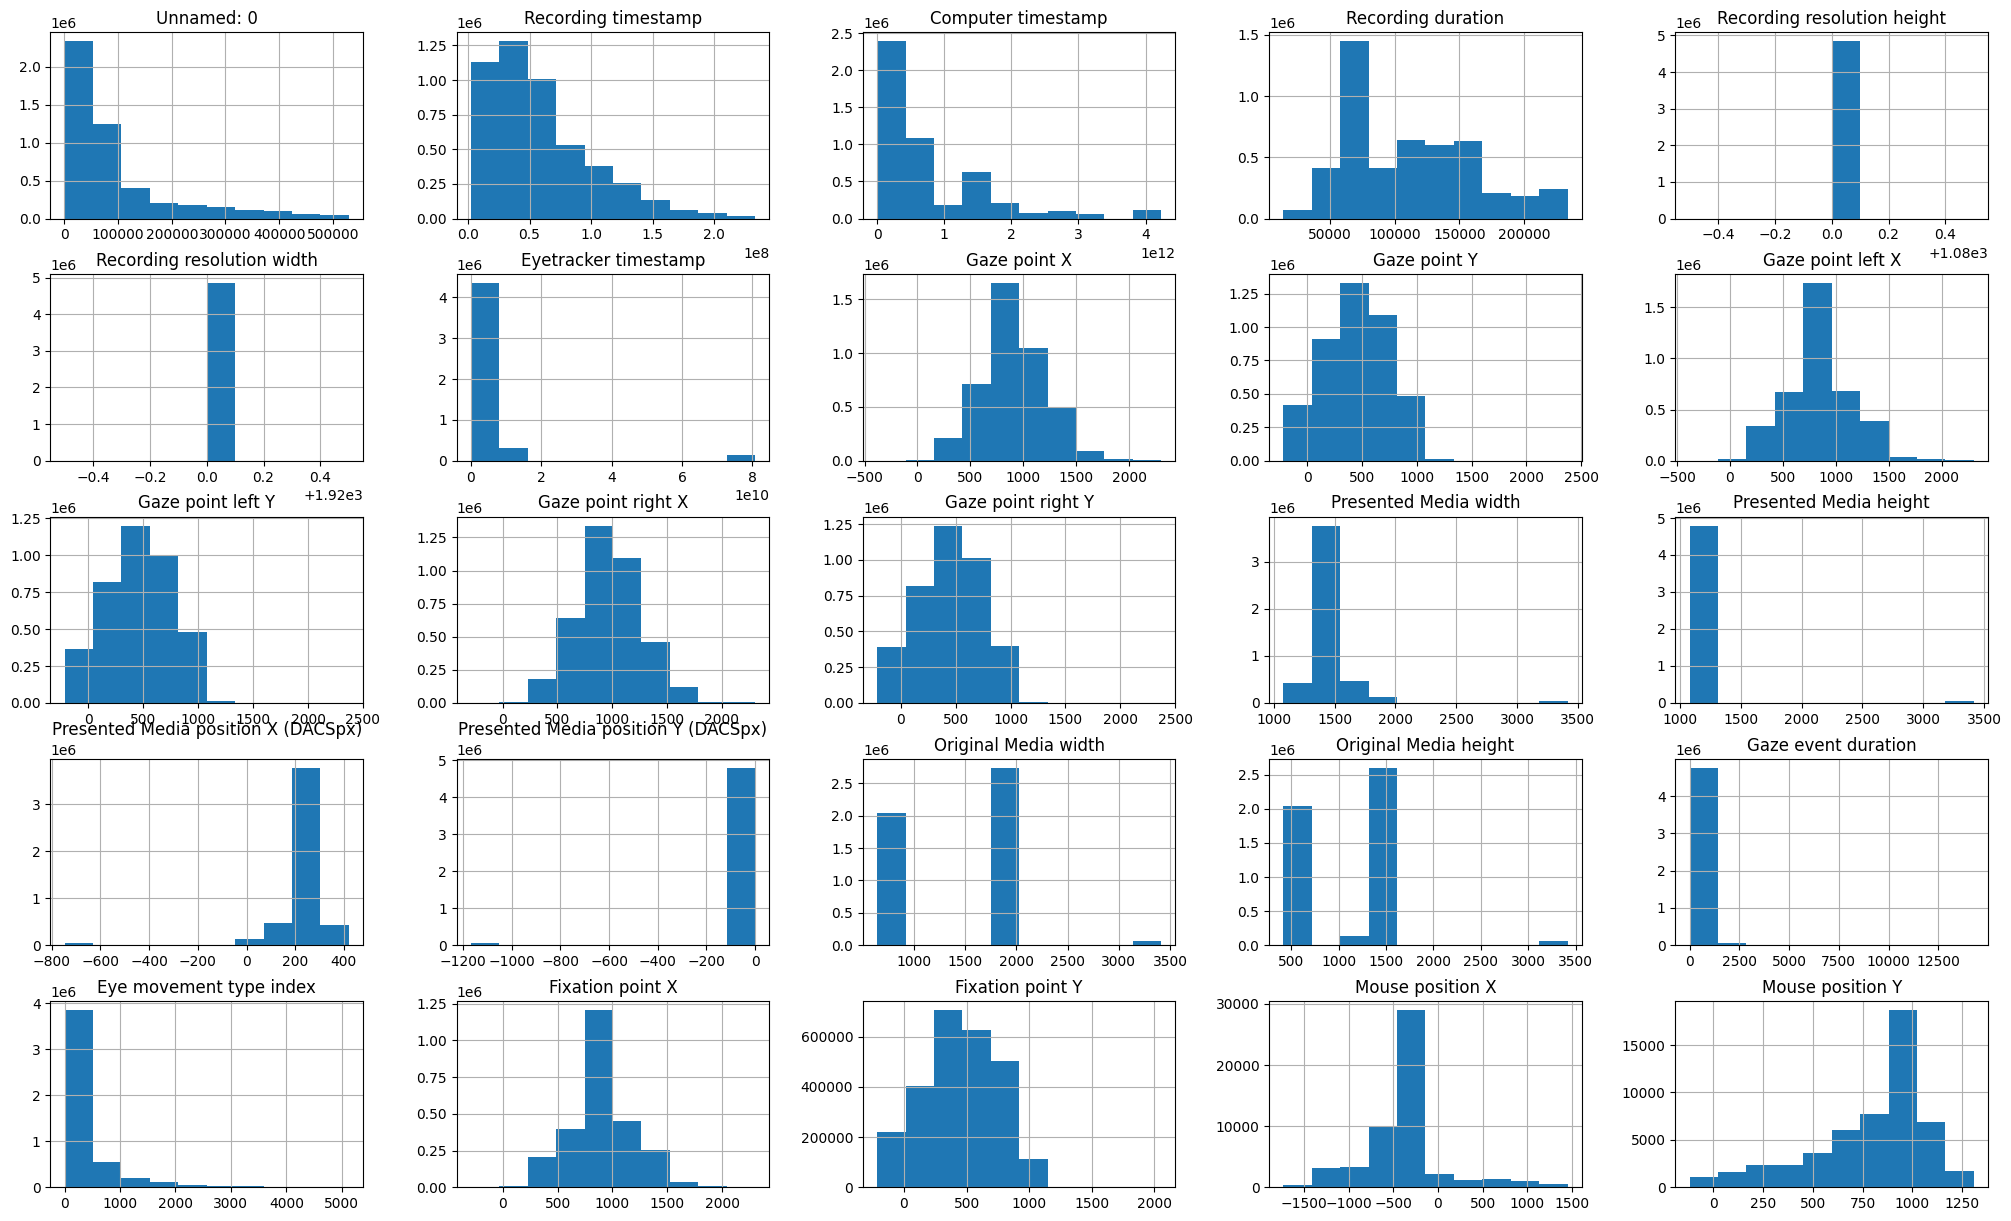

In [9]:
data.hist(figsize=(25, 15)); #Histograms

## Data Preprocessing

In [10]:
#Drop Unnessessary columns
#Preprocesses eye-tracking data by dropping unnecessary columns
unnessessaryColumns =['Timeline name', 'Export date', 
                      'Recording date UTC', 'Mouse position X', 'Recording start time', 
                      'Recording Fixation filter name', 'Presented Stimulus name', 
                      'Recording software version', 'Original Media height', 'Presented Media width', 
                      'Presented Media name', 'Recording date',
                      'Recording duration', 'Event value', 'Sensor', 'Recording name', 
                      'Eye movement type index', 'Recording resolution width', 'Recording resolution height', 
                       'Recording start time UTC', 'Original Media width', 
                      'Presented Media position X (DACSpx)', 'Unnamed: 0', 'Event', 'Presented Media position Y (DACSpx)', 
                      'Mouse position Y', 'Recording monitor latency', 'Project name', 'Presented Media height']

# drop the columns
data_preprocessed = data.drop(columns=unnessessaryColumns)

In [11]:
# replacing all commas to dots in the number values
data_preprocessed = data_preprocessed.replace(to_replace=r',', value='.', regex=True)

cols_to_modify = ['Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 
                          'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 
                          'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)','Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 
                          'Gaze direction right Y', 'Gaze direction right Z',  
                          'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 
                          'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 
                          'Gaze point left X (DACSmm)', 'Gaze point right Y (MCSnorm)', 
                          'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']
    
   
data_preprocessed[cols_to_modify] = data_preprocessed[cols_to_modify].astype(float)

In [12]:
data_preprocessed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844304 entries, 0 to 4844303
Data columns (total 42 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Recording timestamp            int64  
 1   Computer timestamp             int64  
 2   Participant name               object 
 3   Eyetracker timestamp           float64
 4   Gaze point X                   float64
 5   Gaze point Y                   float64
 6   Gaze point left X              float64
 7   Gaze point left Y              float64
 8   Gaze point right X             float64
 9   Gaze point right Y             float64
 10  Gaze direction left X          float64
 11  Gaze direction left Y          float64
 12  Gaze direction left Z          float64
 13  Gaze direction right X         float64
 14  Gaze direction right Y         float64
 15  Gaze direction right Z         float64
 16  Pupil diameter left            object 
 17  Pupil diameter right           object 
 18  Va

In [13]:
from sklearn.preprocessing import LabelEncoder
convert_Columns = ['Validity left','Validity right','Eye movement type','Pupil diameter left','Pupil diameter right']

# Create a LabelEncoder object
LabelEncoder = LabelEncoder()

# Apply label encoding to 'convert_Columns' list
for i in convert_Columns:
    data_preprocessed[i] = LabelEncoder.fit_transform(data_preprocessed[i])

In [14]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844304 entries, 0 to 4844303
Data columns (total 42 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Recording timestamp            int64  
 1   Computer timestamp             int64  
 2   Participant name               object 
 3   Eyetracker timestamp           float64
 4   Gaze point X                   float64
 5   Gaze point Y                   float64
 6   Gaze point left X              float64
 7   Gaze point left Y              float64
 8   Gaze point right X             float64
 9   Gaze point right Y             float64
 10  Gaze direction left X          float64
 11  Gaze direction left Y          float64
 12  Gaze direction left Z          float64
 13  Gaze direction right X         float64
 14  Gaze direction right Y         float64
 15  Gaze direction right Z         float64
 16  Pupil diameter left            int32  
 17  Pupil diameter right           int32  
 18  Va

In [15]:
# filling remaining NaN values with forward fill method
data_preprocessed = data_preprocessed.fillna(method='ffill')

In [16]:
# Check for null values.
for i in data_preprocessed.columns:
    print(i,":",data_preprocessed[i].isnull().sum()/data_preprocessed.shape[0]*100)

Recording timestamp : 0.0
Computer timestamp : 0.0
Participant name : 0.0
Eyetracker timestamp : 4.128560057337442e-05
Gaze point X : 4.128560057337442e-05
Gaze point Y : 4.128560057337442e-05
Gaze point left X : 4.128560057337442e-05
Gaze point left Y : 4.128560057337442e-05
Gaze point right X : 4.128560057337442e-05
Gaze point right Y : 4.128560057337442e-05
Gaze direction left X : 4.128560057337442e-05
Gaze direction left Y : 4.128560057337442e-05
Gaze direction left Z : 4.128560057337442e-05
Gaze direction right X : 4.128560057337442e-05
Gaze direction right Y : 4.128560057337442e-05
Gaze direction right Z : 4.128560057337442e-05
Pupil diameter left : 0.0
Pupil diameter right : 0.0
Validity left : 0.0
Validity right : 0.0
Eye position left X (DACSmm) : 4.128560057337442e-05
Eye position left Y (DACSmm) : 4.128560057337442e-05
Eye position left Z (DACSmm) : 4.128560057337442e-05
Eye position right X (DACSmm) : 4.128560057337442e-05
Eye position right Y (DACSmm) : 4.128560057337442e-

In [17]:
data_preprocessed = data_preprocessed.fillna(method='bfill')

In [18]:
# Check for null values.
for i in data_preprocessed.columns:
    print(i,":",data_preprocessed[i].isnull().sum()/data_preprocessed.shape[0]*100)

Recording timestamp : 0.0
Computer timestamp : 0.0
Participant name : 0.0
Eyetracker timestamp : 0.0
Gaze point X : 0.0
Gaze point Y : 0.0
Gaze point left X : 0.0
Gaze point left Y : 0.0
Gaze point right X : 0.0
Gaze point right Y : 0.0
Gaze direction left X : 0.0
Gaze direction left Y : 0.0
Gaze direction left Z : 0.0
Gaze direction right X : 0.0
Gaze direction right Y : 0.0
Gaze direction right Z : 0.0
Pupil diameter left : 0.0
Pupil diameter right : 0.0
Validity left : 0.0
Validity right : 0.0
Eye position left X (DACSmm) : 0.0
Eye position left Y (DACSmm) : 0.0
Eye position left Z (DACSmm) : 0.0
Eye position right X (DACSmm) : 0.0
Eye position right Y (DACSmm) : 0.0
Eye position right Z (DACSmm) : 0.0
Gaze point left X (DACSmm) : 0.0
Gaze point left Y (DACSmm) : 0.0
Gaze point right X (DACSmm) : 0.0
Gaze point right Y (DACSmm) : 0.0
Gaze point X (MCSnorm) : 0.0
Gaze point Y (MCSnorm) : 0.0
Gaze point left X (MCSnorm) : 0.0
Gaze point left Y (MCSnorm) : 0.0
Gaze point right X (MCSno

## Questionnaire Data

In [19]:
question_Dataset = pd.read_csv("CE888/Questionnaire_datasetIB.csv", encoding= 'unicode_escape')
question_Dataset.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds


In [20]:
data_preprocessed['Participant name'] = data_preprocessed['Participant name'].str[-2:].astype(int)
data_preprocessed.rename(columns={'Participant name': 'Participant nr'}, inplace=True)

In [21]:
#Merging with score dataset 
data_preprocessed = data_preprocessed.merge(question_Dataset[['Participant nr','Total Score extended']],on = 'Participant nr',how ='inner')

In [22]:
data_preprocessed.head()

,Recording timestamp,Computer timestamp,Participant nr,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,...,Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Eye movement type,Gaze event duration,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Total Score extended
0,23419315,512092386,1,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,...,0.2685,0.5135,0.3721,1,117.0,971.0,341.0,0.5073,0.316,137
1,23419315,512092386,1,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,...,0.2685,0.5135,0.3721,1,117.0,971.0,341.0,0.5073,0.316,137
2,23426120,512099191,1,509880650.0,962.0,346.0,943.0,290.0,980.0,402.0,...,0.2685,0.5135,0.3721,1,117.0,971.0,341.0,0.5073,0.316,137
3,23434449,512107520,1,509888979.0,962.0,350.0,912.0,292.0,1012.0,409.0,...,0.2703,0.5350,0.3785,1,117.0,971.0,341.0,0.5073,0.316,137
4,23442782,512115853,1,509897311.0,962.0,346.0,912.0,292.0,1012.0,400.0,...,0.2703,0.5350,0.3701,1,117.0,971.0,341.0,0.5073,0.316,137


# Visualisation

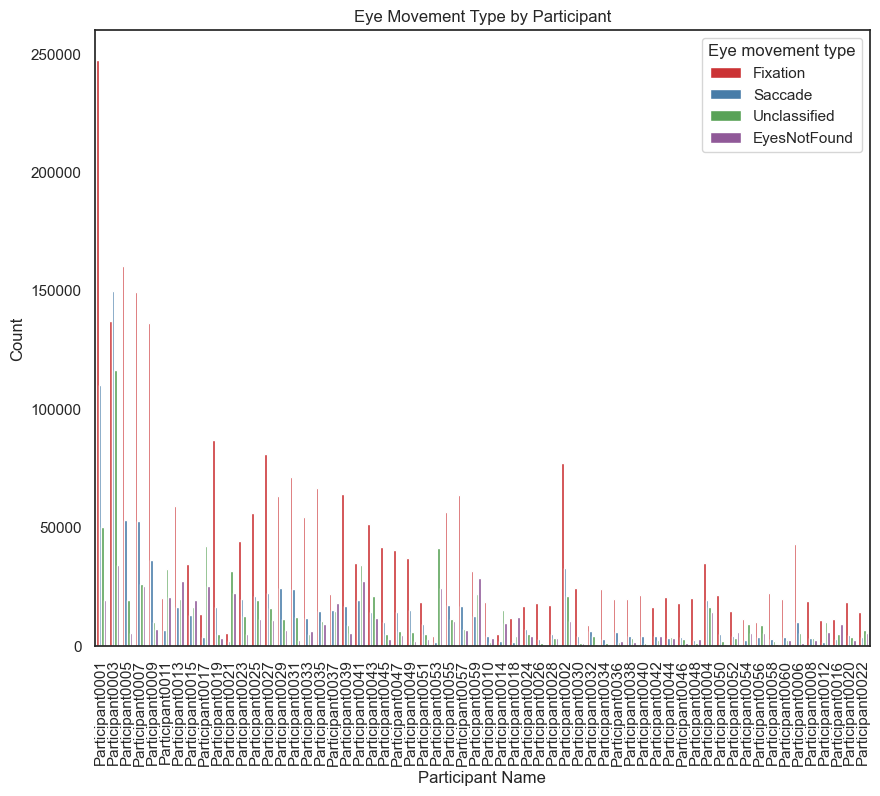

In [48]:
# Visualizing number of Eye movement types among Participants

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the countplot
ax = sns.countplot(x='Participant name', hue='Eye movement type', data=data, palette='Set1')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Add a title and axis labels
plt.title('Eye Movement Type by Participant')
plt.xlabel('Participant Name')
plt.ylabel('Count')

# Display the plot
plt.show()

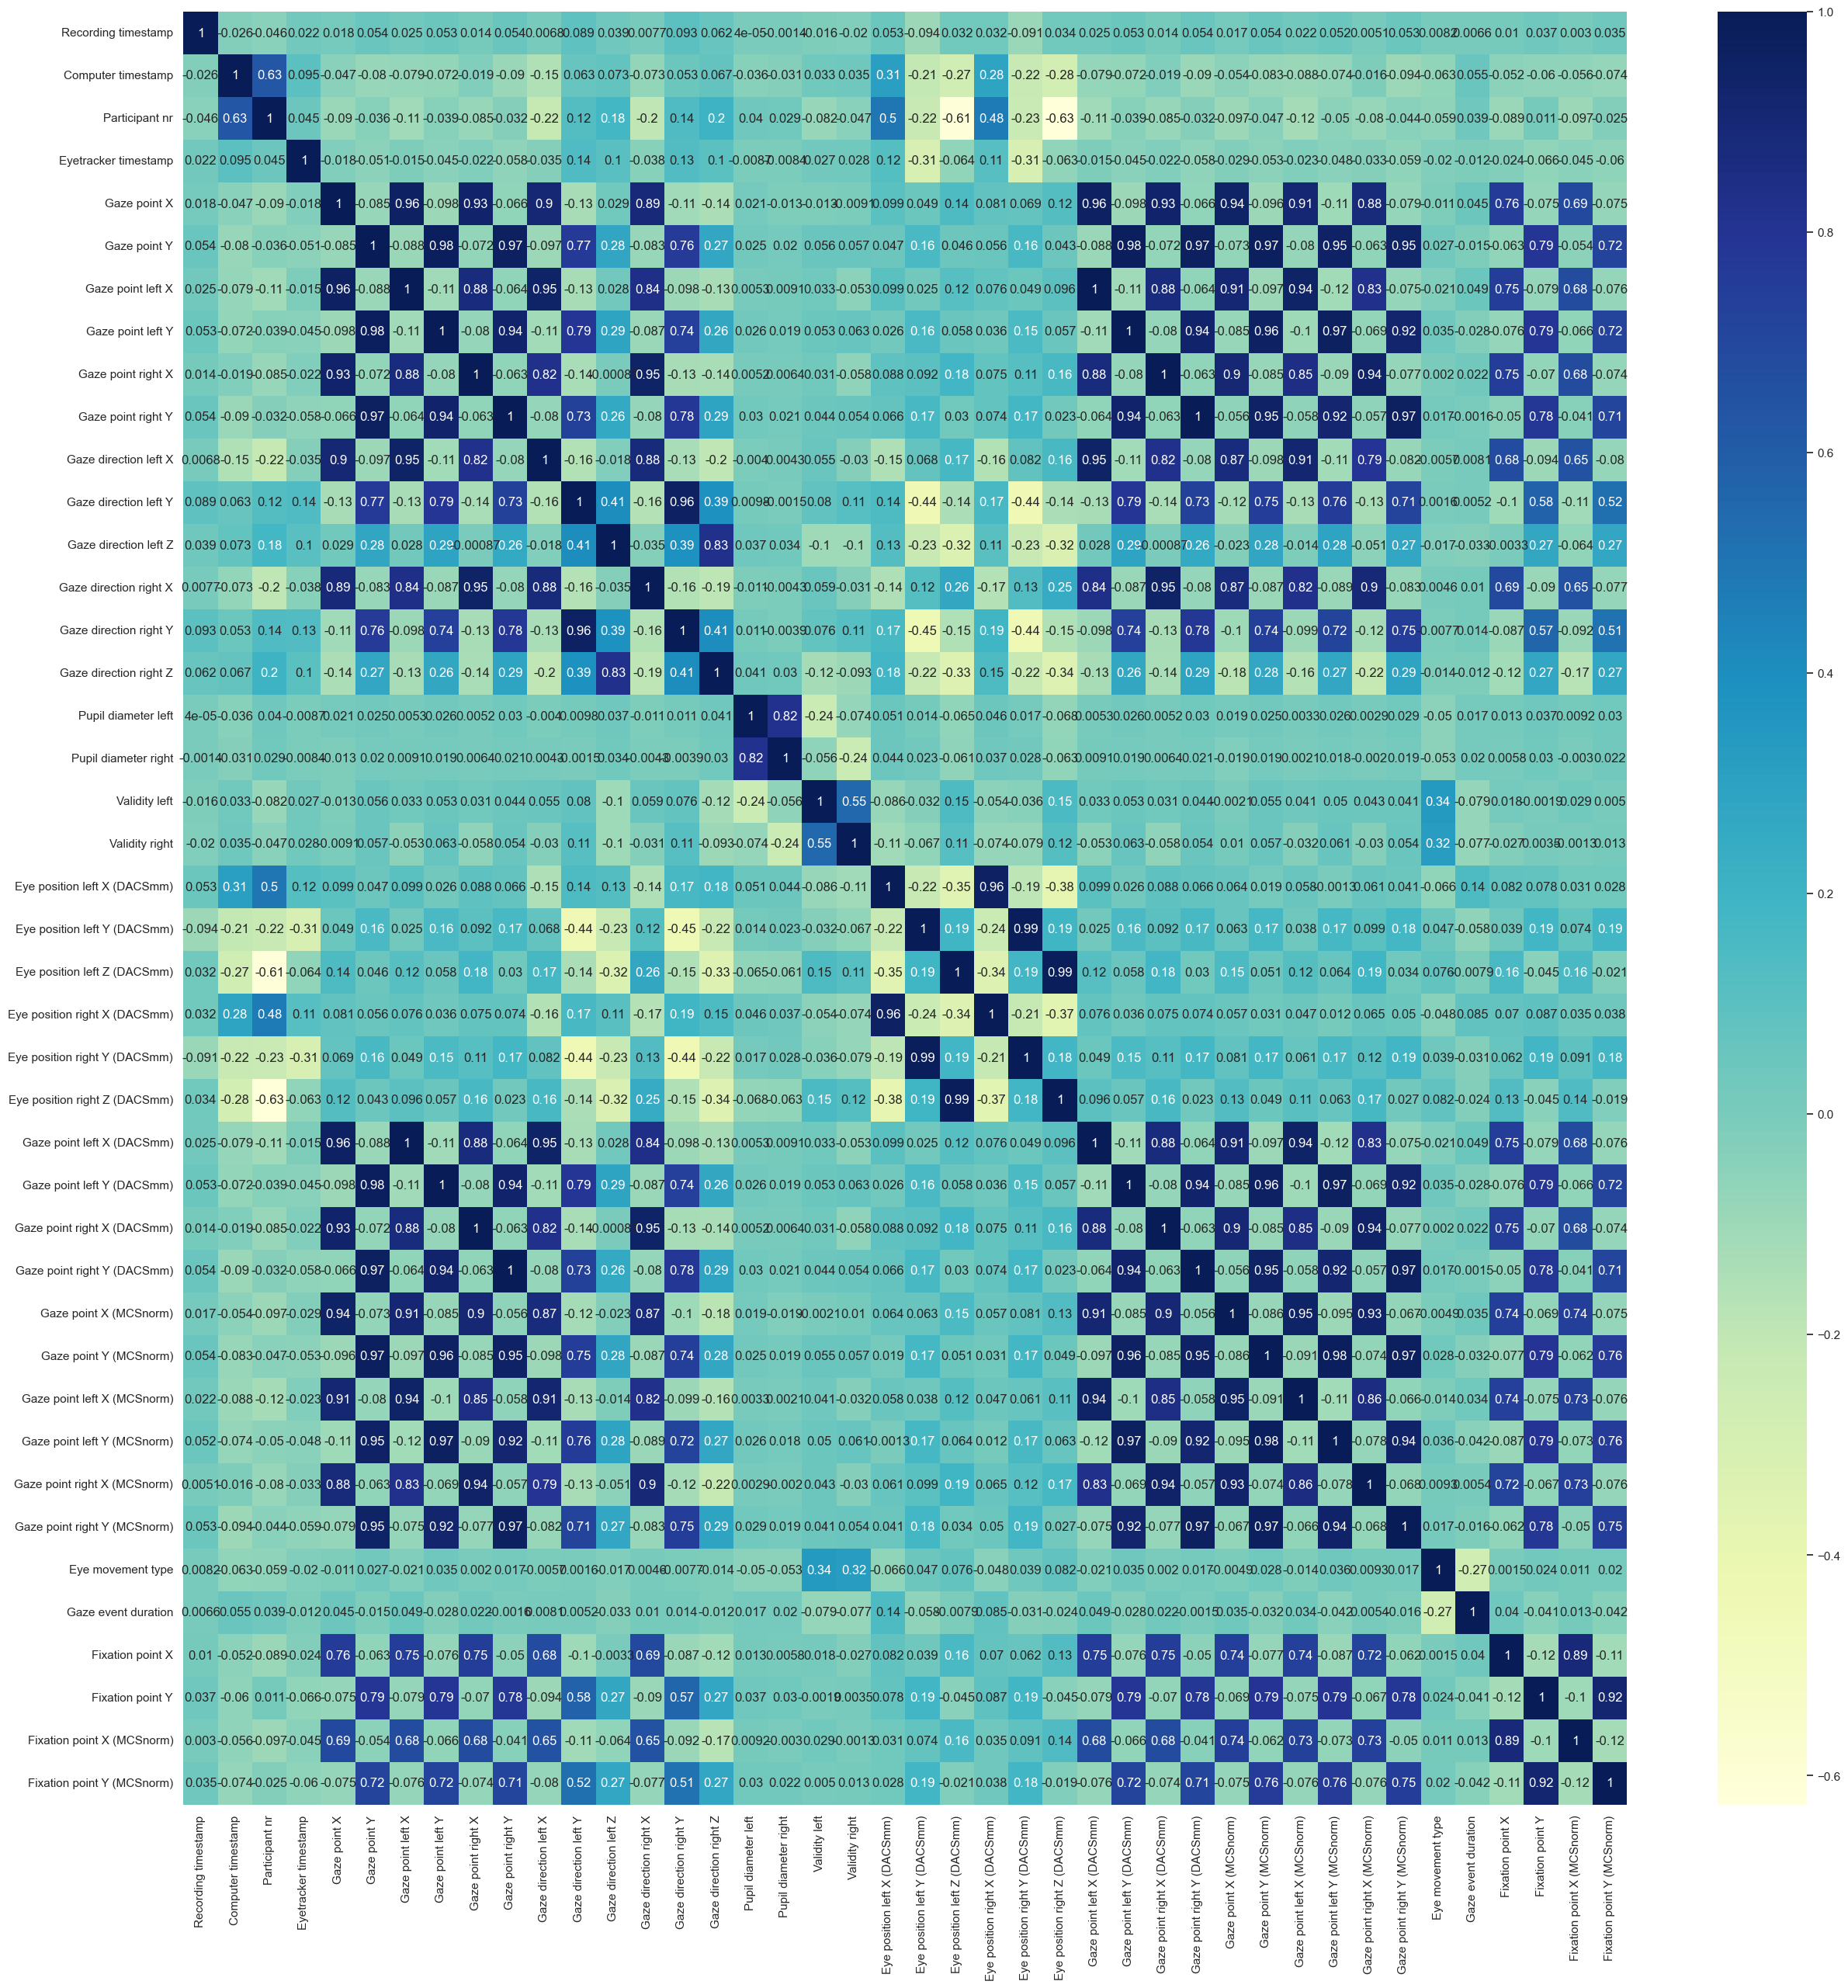

In [50]:
# ploting the correlation heatmap
corr = data_preprocessed.corr()
sns.set(style='white')
plt.figure(figsize=(30,30))
sns.heatmap(data_preprocessed.drop('Total Score extended', axis=1).corr(), annot=True, cmap='YlGnBu')
# show the plot
plt.show()

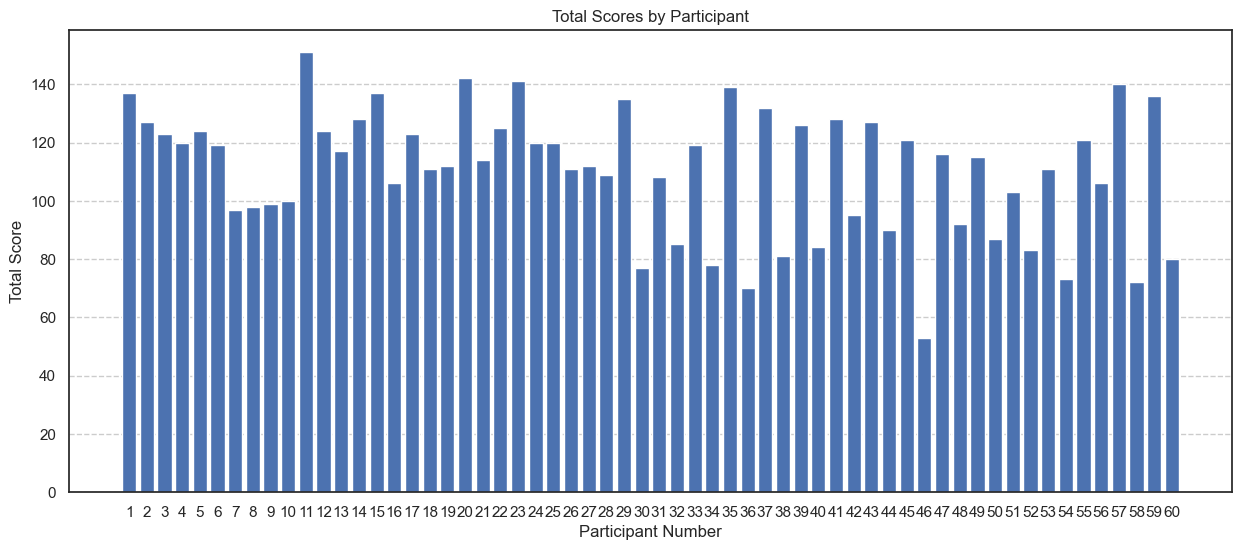

In [39]:
# Grouping the questionnaire data by Participant nr and summing their scores
participant_scores = question_Dataset.groupby('Participant nr')['Total Score extended'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(15, 6))
plt.bar(participant_scores['Participant nr'], participant_scores['Total Score extended'])
plt.title('Total Scores by Participant')
plt.xlabel('Participant Number')
plt.ylabel('Total Score')
plt.xticks(participant_scores['Participant nr'])
plt.grid(axis='y', linestyle='--')
plt.show()



## Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = data_preprocessed.drop(columns=['Total Score extended'])
y = data_preprocessed['Total Score extended']
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [25]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3875443, 42) (3875443,)
(968861, 42) (968861,)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

RandomForestRegressor = RandomForestRegressor(n_estimators=50, random_state=42)

# training model to the training data
RandomForestRegressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = RandomForestRegressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 2.8718194374631665
R-squared: 0.9828636418840544
Mean Absolute Error: 0.10376844562842359
